<img src="./logo.png" style="width:1400px;height:250px"/>


## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: Vinícius Wasques
### Alunos: Gabriel Pereira, Isabela Beneti e Ygor Ruas

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [2]:
def calor_inicial(x):
    return x*((1-x)**2)

def solucao_eq_calor_posicao(U, t, lu, piv, r):
    """Essa é uma função que resolve a equação do calor em relação à posição em um determinado instante de tempo.
    
    Args:
        U: matriz contendo a solução até o momento
        t: tempo
        R: matriz dos coeficientes
        r: constante do problema
    
    Return:
        Uma matriz contendo a solução das posições
    """
    
    n_colunas = len(U[0])
    y = np.zeros(n_colunas - 2)
    u_n = U[t]
    
    for j in range(n_colunas - 2):
        y[j] = (2 - 2 * r)*u_n[j + 1] - u_n[j] - u_n[j + 2]
        
    y[0] = y[0] - U[t + 1, 0]
    y[-1] = y[-1] - U[t + 1, -1]
    
    u = lu_solve((lu, piv), y)
    
    return u
    

def solucao_eq_calor(g, h, k, u_x_0, u_x_1):
    """Essa é uma função que resolve a equação do calor em uma dimensão a partir do método de diferenças finitas.
    
    Args:
        g: passo utilizado na variável de tempo
        h: passo utilizado na variável de espaço
        k: constante k
        u_x_0: valor da função calor na posição inicial
        u_x_1: valor da função calor na posição final
        
    Return:
        Solução da equação para as duas dimensões, admitindo que o domínio discreto é conhecido, a função retorna apenas uma matriz de ordem (1/g) x (1/h)
    """
    
    n_linhas = round(1/g)
    n_colunas = round(1/h)
    
    U = np.zeros((n_linhas, n_colunas))
    
    x = np.linspace(0, 1, n_colunas)
    t = np.linspace(0, 1, n_linhas)
    
    for j in range(n_colunas):
        U[0, j] = calor_inicial(x[j])
        
    U[:, 0] = u_x_0
    U[:, -1] = u_x_1
        
    r = (h**2)/(g*k)
    
    R = np.zeros((n_colunas - 2, n_colunas - 2))
    
    R[0, 0], R[-1, -1] = -(2 + 2 * r), -(2 + 2 * r)
    R[0, 1], R[-1, -2] = 1, 1
    
    for i in range(1, n_colunas - 3):
        R[i, i] = -(2 + 2 * r)
        R[i, i+1] = 1
        R[i, i-1] = 1
    
    lu, piv = lu_factor(R)
    
    for t_ in range(n_linhas - 1):
        
        u = solucao_eq_calor_posicao(U, t_, lu, piv, r)
        
        for j in range(0, n_colunas - 2):
            U[t_ + 1, j + 1] = u[j]
        
    return U, x, t, R

In [3]:
U, x, t, R = solucao_eq_calor(0.0005, 0.0005, 0.5, 0, 0)

In [4]:
R

array([[-2.002,  1.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , -2.002,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   , -2.002, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ..., -2.002,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  1.   , -2.002,  1.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  1.   , -2.002]])

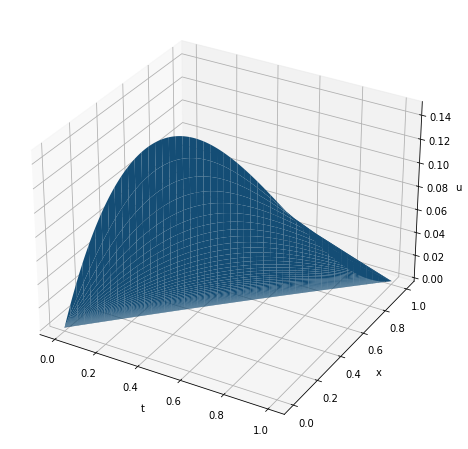

In [5]:
# Criar a figura e os eixos 3D
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico 3D
ax.plot_surface(t, x, U)

# Definir rótulos dos eixos
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')

# Mostrar o gráfico
plt.show()

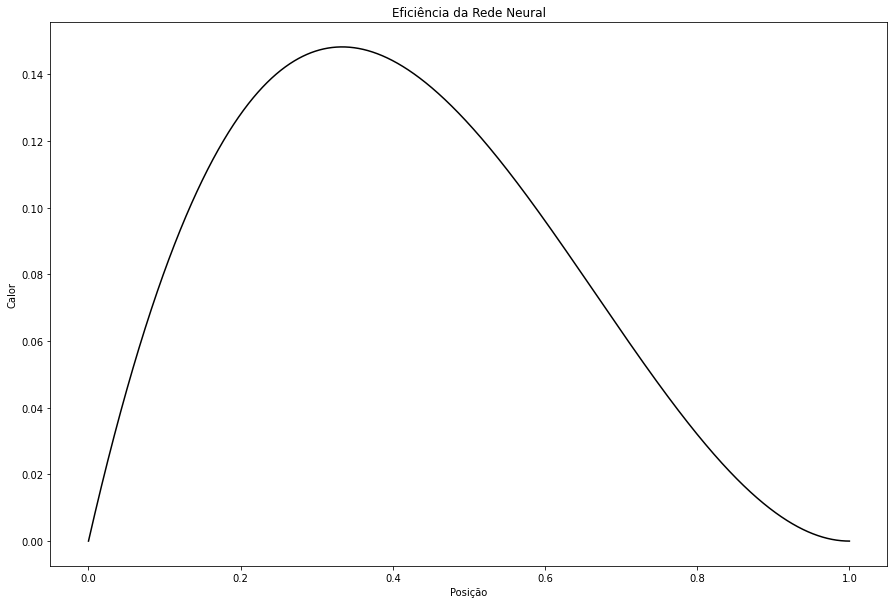

In [12]:
fig = plt.figure(figsize = (15, 10))

plt.plot(t, U[0], c = 'black')
plt.xlabel('Posição')
plt.ylabel('Calor')

plt.title('Eficiência da Rede Neural')

#plt.savefig('Eficácia da Rede Neural.png', dpi = 300)

plt.show()